In [8]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import keras.utils as image



(train_x,train_y), (test_x,test_y) =mnist.load_data()

train_x = train_x.astype('float32') / 255
# test_x = test_x.astype('float32')/255


'''print(train_x)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)'''


train_x = train_x.reshape(60000,784)
# test_x = test_x.reshape(10000,784)


train_y = keras.utils.to_categorical(train_y,10)
# test_y = keras.utils.to_categorical(test_y,10)


#Initialize our data ************

model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))


#*** Compile the model **********


model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])


model.fit(train_x,train_y,batch_size=32,epochs=10,verbose=1)
#accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)
#print("Accuracy: ",accuracy[1])


model.save("mnist-model.h5")

# load feautures after training our model
model.load_weights("mnist-model.h5")




Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.0129 - accuracy: 0.4411
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1153 - accuracy: 0.7288
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6475 - accuracy: 0.8298
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4931 - accuracy: 0.8664
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4204 - accuracy: 0.8848
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3788 - accuracy: 0.8936
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3514 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3312 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3152 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.302

1/1 [==============================] - 0s 165ms/step
Class:  0


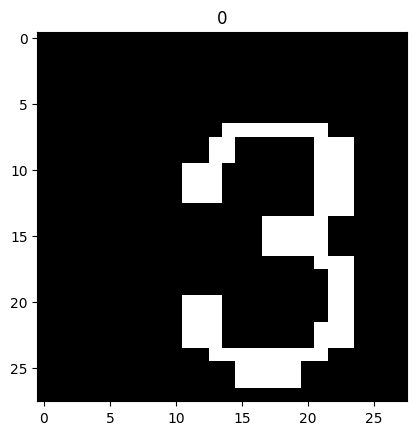

[[4.9101785e-01 3.5642554e-06 1.0632341e-03 1.2607977e-02 3.5288758e-04
  4.2404768e-01 1.0324405e-04 4.2943753e-02 8.6179720e-03 1.9241871e-02]]


In [11]:
import numpy as np
from PIL import Image
test_img = Image.open("3.jpg").convert('L')
test_img = test_img.resize((28,28))
test_img = np.array(test_img)
img = test_img.copy()
img = img.reshape(1,784)
#img = 255-img
img[img<100]=0
img[img>=100]=255
img = img.astype('float32') / 255
predict_x=model.predict(img) 
classes_x=np.argmax(predict_x,axis=1)



classname = classes_x[0]
#img = 255 - test_img
        #những giá trị nhỏ hơn 100 thì đặt bằng 0

print("Class: ",classname)
img = img.reshape((28,28))
plt.imshow(img, cmap = 'gray')
plt.title(classname)
plt.show()
print(predict_x)

1/1 [==============================] - 0s 34ms/step
Class:  2


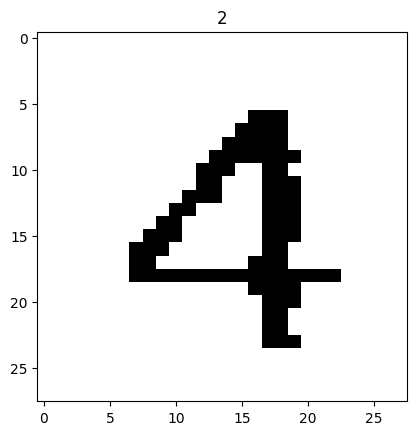

[[9.0942864e-05 1.5783196e-07 8.9085019e-01 7.1428083e-02 2.9219384e-11
  1.9951500e-02 4.8462418e-08 5.0966082e-07 1.7678173e-02 4.9005746e-07]]


In [12]:
import numpy as np
from PIL import Image
test_img = Image.open("crop/crop_0_1.jpg_clear.jpg").convert("L")
test_img = test_img.resize((28,28))
test_img = np.array(test_img)
img = test_img.reshape(1,784)
#img = 255-img
#làm mờ

img[img<100]=0
img[img>=100]=255
img = img.astype('float32') / 255

predict_x=model.predict(img) 
classes_x=np.argmax(predict_x,axis=1)



classname = classes_x[0]
#img = 255 - test_img
        #những giá trị nhỏ hơn 100 thì đặt bằng 0

print("Class: ",classname)
img = img.reshape((28,28))
plt.imshow(img, cmap = 'gray')
plt.title(classname)
plt.show()
print(predict_x)

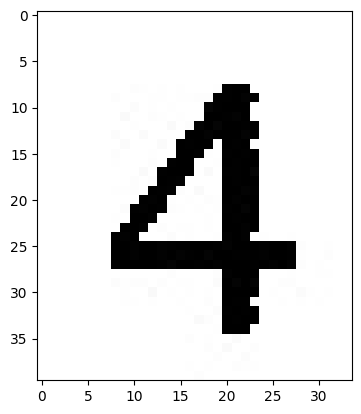

''

In [13]:
import cv2
import numpy as np
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'D:\new_program\Tesseract-OCR\tesseract.exe'

test_img = Image.open("crop/crop_0_1.jpg_clear.jpg").convert("L")
#dùngc

img = cv2.imread("crop/crop_0_1.jpg_clear.jpg")
plt.imshow(img)
plt.show()
text = pytesseract.image_to_string(img)
text
